In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("data.csv")

x1 = data.iloc[:, 0]
x2 = data.iloc[:, 1]
x3 = data.iloc[:, 2]
x4 = data.iloc[:, 3]
x5 = data.iloc[:, 4]
y = data.iloc[:, 5]

print(data.head())

         X1        X2        X3        X4        X5         y
0  0.496714 -0.138264  0.647689  1.523030 -0.234153  2.583221
1 -0.234137  1.579213  0.767435 -0.469474  0.542560  1.169521
2 -0.463418 -0.465730  0.241962 -1.913280 -1.724918  6.068924
3 -0.562288 -1.012831  0.314247 -0.908024 -1.412304  4.025751
4  1.465649 -0.225776  0.067528 -1.424748 -0.544383  9.115352


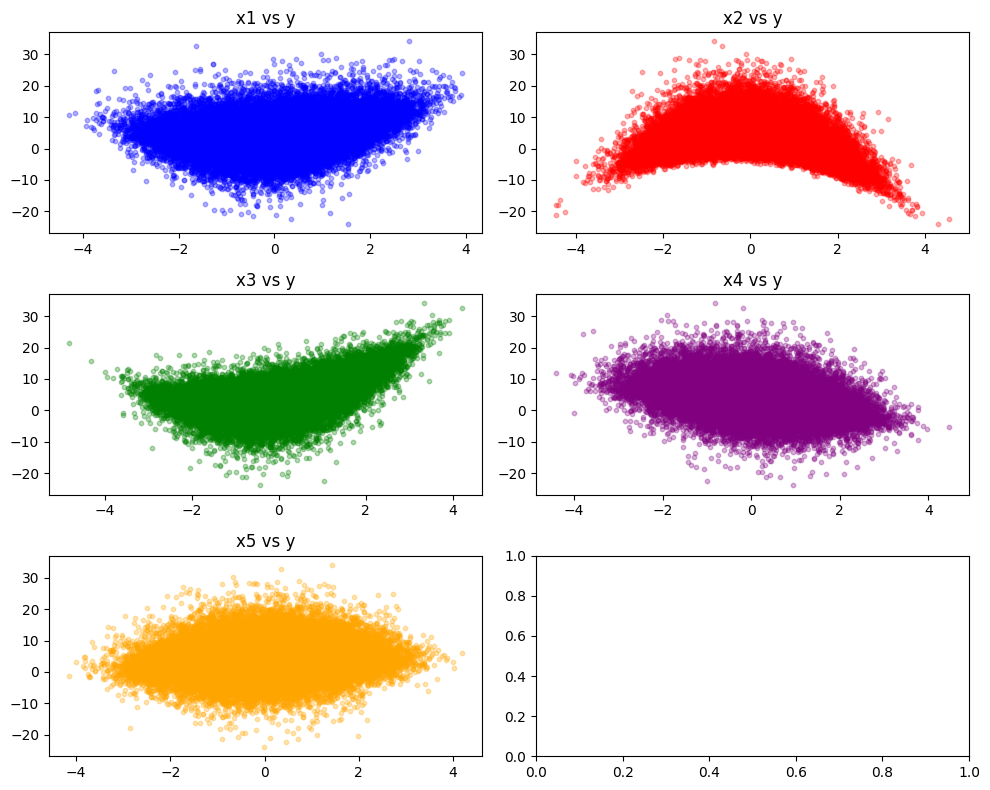

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  # 3 filas, 2 columnas

axes[0, 0].scatter(x1, y, color="blue", s=10, alpha=0.3)
axes[0, 0].set_title("x1 vs y")

axes[0, 1].scatter(x2, y, color="red", s=10, alpha=0.3)
axes[0, 1].set_title("x2 vs y")

axes[1, 0].scatter(x3, y, color="green", s=10, alpha=0.3)
axes[1, 0].set_title("x3 vs y")

axes[1, 1].scatter(x4, y, color="purple", s=10, alpha=0.3)
axes[1, 1].set_title("x4 vs y")

axes[2, 0].scatter(x5, y, color="orange", s=10, alpha=0.3)
axes[2, 0].set_title("x5 vs y")

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

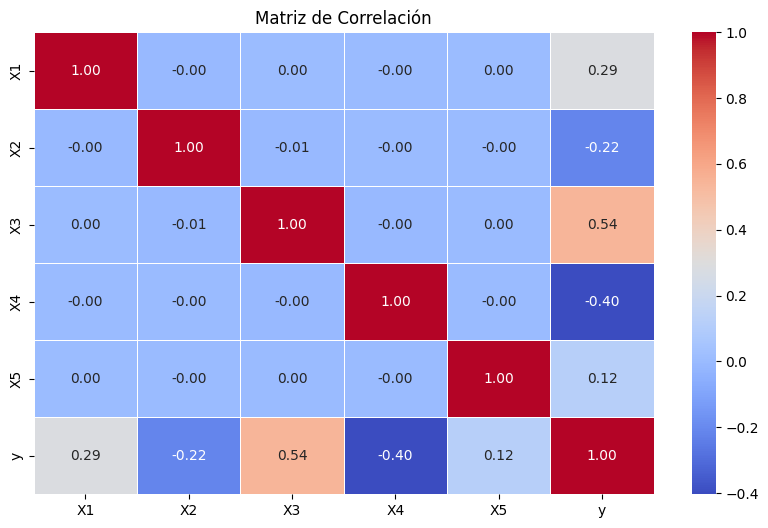

In [5]:
corr_matrix = data.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación")
plt.show()

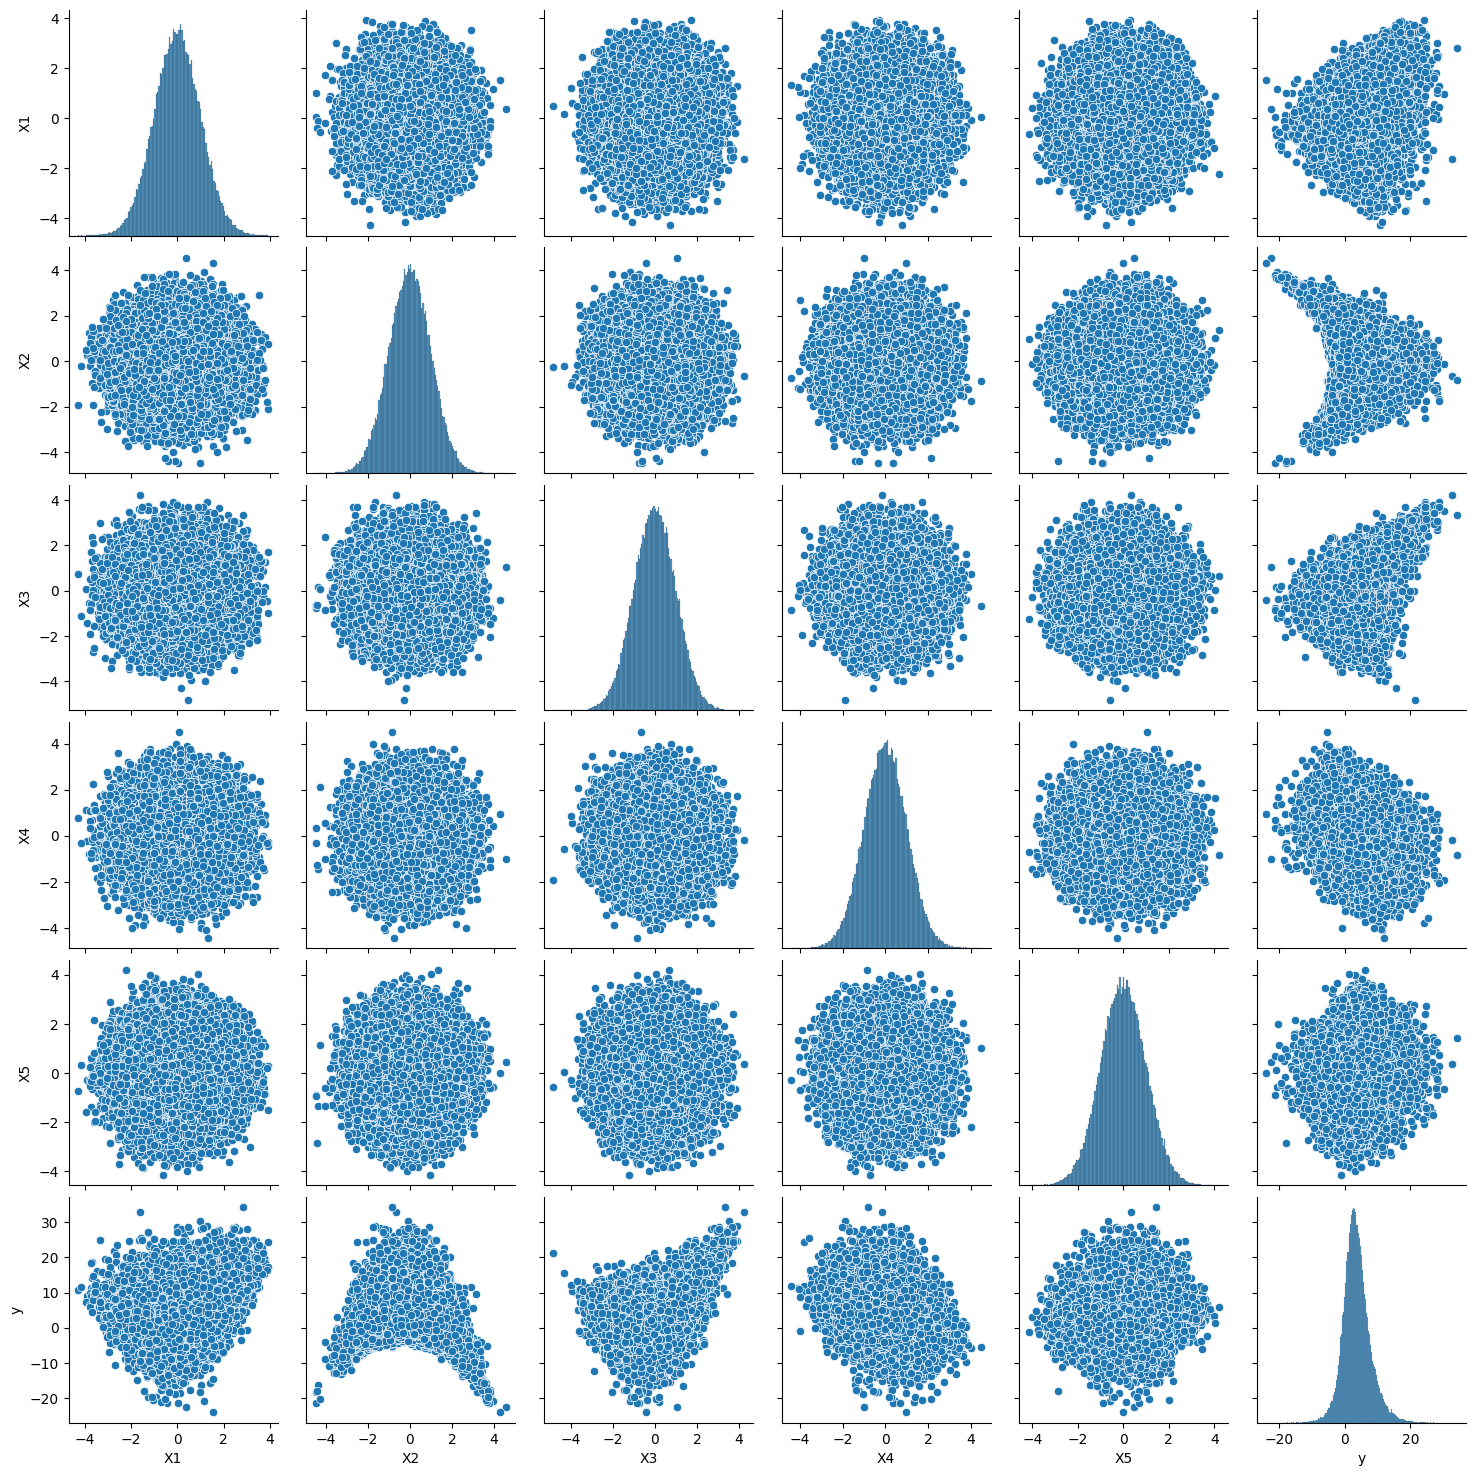

In [6]:
sns.pairplot(data)
plt.show()

# Derivación de la ecuación normal


In [18]:
n = 3 # Grado maximo del polinomio

# Extraer todas las variables predictoras (todas las columnas excepto la última)
X = data.iloc[:, :-1].values
# Extraer la variable dependiente
y = data.iloc[:, -1].values 
# Iterar sobre los grados del polinomio (de 1 a n)

def polynomial_design_matrix(X, degree):
    """
    Genera la matriz de diseño para regresión polinómica usando solo numpy.
    
    Parameters:
    X : ndarray de forma (m, n) con m muestras y n características.
    degree : int, grado máximo del polinomio.
    
    Returns:
    X_poly : ndarray de forma (m, k) con los términos polinómicos hasta el grado especificado.
    """
    m, n = X.shape
    X_poly = np.ones((m, 1))  # Incluir término de sesgo
    
    for d in range(1, degree + 1):
        for i in range(n):
            X_poly = np.hstack((X_poly, X[:, i:i+1]**d))
    
    return X_poly


for i in range(1, n+1):
    # Construir la matriz de diseño con términos polinómicos manualmente
    X_poly = polynomial_design_matrix(X, i)

    # Aplicar la ecuación normal para calcular los coeficientes theta
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    # Calcular el número de condición
    cond_number = np.linalg.cond(X_poly.T @ X_poly)

    # Imprimir el número de condición
    print(f"Número de condición para polinomio de grado {i}: {cond_number}")

    # Imprimir los coeficientes obtenidos
    print(f"Coeficientes theta para polinomio de grado {i}: {theta}")
    print("\n")

Número de condición para polinomio de grado 1: 1.0244070144245496
Coeficientes theta para polinomio de grado 1: [ 3.59615877  1.19461459 -0.89613225  2.27489442 -1.69655279  0.49387752]


Número de condición para polinomio de grado 2: 29.987803924163813
Coeficientes theta para polinomio de grado 2: [ 2.99973401e+00  1.20105427e+00 -8.97602942e-01  2.30039459e+00
 -1.70227003e+00  4.98601667e-01  7.99920510e-01 -1.29968780e+00
  1.09998081e+00 -1.06390004e-02 -5.43742360e-04]


Número de condición para polinomio de grado 3: 61.21574690085057
Coeficientes theta para polinomio de grado 3: [ 2.99975965e+00  1.20165961e+00 -8.96968388e-01  2.30102956e+00
 -1.70133201e+00  4.99088137e-01  7.99917768e-01 -1.29969166e+00
  1.09997235e+00 -1.06551409e-02 -5.42575644e-04 -2.01248682e-04
 -2.15253852e-04 -2.13305527e-04 -3.12049690e-04 -1.60748577e-04]




In [19]:
# Número total de datos
num_datos = data.shape[0]
print("Numero total de datos:", num_datos)

# Mezclar los índices de los datos
np.random.seed(42)
indices = np.random.permutation(num_datos)

# Separar en 80% entrenamiento y 20% prueba
train_size = int(0.8 * num_datos)  # 80% del total

train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Crear los conjuntos de entrenamiento y prueba
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

print(f"Datos de entrenamiento: {train_data.shape[0]}")
print(f"Datos de prueba: {test_data.shape[0]}")

Numero total de datos: 100000
Datos de entrenamiento: 80000
Datos de prueba: 20000


In [20]:
n = 5 # Grado maximo del polinomio

def mean_squared_error(y_true, y_pred):
    """Calcula el error cuadrático medio (MSE)."""
    return np.mean((y_true - y_pred) ** 2)

# Diccionario para almacenar los modelos
models = {}

# Extraer las variables predictoras y la variable dependiente del conjunto de prueba
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Iterar sobre los grados del polinomio (de 1 a n)
for i in range(1, n+1):
    # Construir la matriz de diseño para entrenamiento y prueba
    X_poly_train = polynomial_design_matrix(X, i)
    X_poly_test = polynomial_design_matrix(X_test, i)

    # Aplicar la ecuación normal para calcular los coeficientes theta
    theta = np.linalg.inv(X_poly_train.T @ X_poly_train) @ X_poly_train.T @ y

    # Calcular el número de condición
    cond_number = np.linalg.cond(X_poly_train.T @ X_poly_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = X_poly_test @ theta

    # Calcular el MSE en el conjunto de prueba
    mse = mean_squared_error(y_test, y_pred)

    # Almacenar el modelo en el diccionario
    models[i] = {
        "theta": theta,
        "cond_number": cond_number,
        "MSE": mse
    }

    # Imprimir los resultados
    print(f"Grado {i}: Número de condición = {cond_number}, MSE = {mse}")

# Encontrar el modelo con el menor MSE
best_degree = min(models, key=lambda k: models[k]["MSE"])
print(f"\nEl mejor modelo es el de grado {best_degree} con MSE = {models[best_degree]['MSE']}")

Grado 1: Número de condición = 1.0244070144245496, MSE = 7.2855158652724
Grado 2: Número de condición = 29.987803924163813, MSE = 0.2506674287984931
Grado 3: Número de condición = 61.21574690085057, MSE = 0.2506775176930928
Grado 4: Número de condición = 1031.310932087579, MSE = 0.2506844338201413
Grado 5: Número de condición = 7058.48906085433, MSE = 0.2506793234936928

El mejor modelo es el de grado 2 con MSE = 0.2506674287984931


In [21]:
def compute_cost(X, y, theta):
    """
    Calcula el error cuadrático medio (MSE) como función de costo.
    """
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Aplica gradiente descendente para minimizar la función de costo.
    
    Parameters:
        X : ndarray -> Matriz de diseño (muestras x características)
        y : ndarray -> Vector de etiquetas (m, 1)
        theta : ndarray -> Vector de coeficientes (n+1, 1)
        alpha : float -> Tasa de aprendizaje
        num_iters : int -> Número de iteraciones

    Returns:
        theta : ndarray -> Coeficientes ajustados
        J_history : list -> Historial de la función de costo
    """
    m = len(y)
    J_history = []

    for _ in range(num_iters):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1 / m) * (X.T @ errors)
        theta -= alpha * gradient  # Actualizar los coeficientes

        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

# 🔹 Datos de ejemplo
X = np.array([[1], [2], [3], [4], [5]])  # Característica
y = np.array([[2], [3], [5], [7], [11]])  # Etiqueta

degree = 2  # Grado del polinomio
X_poly = polynomial_design_matrix(X, degree)  # Expandir características

# 🔹 Inicializar parámetros
theta = np.zeros((X_poly.shape[1], 1))
alpha = 0.01  # Tasa de aprendizaje
num_iters = 1000  # Iteraciones

# 🔹 Aplicar gradiente descendente
theta_final, J_history = gradient_descent(X_poly, y, theta, alpha, num_iters)

print("Coeficientes finales:\n", theta_final)

Coeficientes finales:
 [[-9.67237214e+26]
 [-3.92760599e+27]
 [-1.70254880e+28]]


In [22]:
# def mean_squared_error(y_true, y_pred):
#     """Calcula el error cuadrático medio (MSE)."""
#     return np.mean((y_true - y_pred) ** 2)

# def gradient_descent(X, y, theta, alpha, num_iters):
#     """Aplica gradiente descendente para minimizar la función de costo."""
#     m = len(y)
#     J_history = []

#     for _ in range(num_iters):
#         predictions = X @ theta
#         errors = predictions - y
#         gradient = (1 / m) * (X.T @ errors)
#         theta -= alpha * gradient  # Actualizar coeficientes

#         J_history.append(mean_squared_error(y, predictions))

#     return theta, J_history

# # 🔹 Configuración
# n = 5  # Grado máximo del polinomio
# alpha = 0.01  # Tasa de aprendizaje
# num_iters = 1000  # Iteraciones del gradiente descendente

# # 🔹 Diccionario para almacenar los modelos
# models = {}

# # 🔹 Extraer variables predictoras y dependientes
# X_train = train_data.iloc[:, :-1].values
# y_train = train_data.iloc[:, -1].values.reshape(-1, 1)

# X_test = test_data.iloc[:, :-1].values
# y_test = test_data.iloc[:, -1].values.reshape(-1, 1)

# # 🔹 Entrenamiento y evaluación de modelos con diferentes grados
# for i in range(1, n + 1):
#     # Expandir características para entrenamiento y prueba
#     X_poly_train = polynomial_design_matrix(X_train, i)
#     X_poly_test = polynomial_design_matrix(X_test, i)

#     # Inicializar los coeficientes en ceros
#     theta = np.zeros((X_poly_train.shape[1], 1))

#     # Aplicar gradiente descendente
#     theta_final, J_history = gradient_descent(X_poly_train, y_train, theta, alpha, num_iters)

#     # Hacer predicciones en el conjunto de prueba
#     y_pred = X_poly_test @ theta_final

#     # Calcular el MSE en prueba
#     mse = mean_squared_error(y_test, y_pred)

#     # Almacenar el modelo
#     models[i] = {
#         "theta": theta_final,
#         "MSE": mse
#     }

#     # Imprimir resultados
#     print(f"Grado {i}: MSE en prueba = {mse}")

# # 🔹 Determinar el mejor modelo
# best_degree = min(models, key=lambda k: models[k]["MSE"])
# print(f"\nEl mejor modelo es el de grado {best_degree} con MSE = {models[best_degree]['MSE']}")

Dado un conjunto de datos

$$\lbrace(x_{i1}, x_{i2}, ... , y_i)\rbrace_{i=1}^{n}$$

Buscamos encontrar un vector